In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pybear/cats-vs-dogs")

print("Path to dataset files:", path)

100%|██████████| 788M/788M [00:06<00:00, 129MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pybear/cats-vs-dogs/versions/1


In [ ]:
import os
from PIL import Image


In [3]:
raw_images = path + "/PetImages/"
cleaned_images = path + "/PetImages/cleaned"

os.makedirs(cleaned_images, exist_ok=True)


In [4]:
for categories in ['Cat', 'Dog']:
    os.makedirs(os.path.join(cleaned_images , categories), exist_ok= True)
    source_folder = os.path.join(raw_images , categories)
    cleaned_folder = os.path.join(cleaned_images , categories)


    for img_name in os.listdir(source_folder):
        source_path = os.path.join(source_folder, img_name)
        cleaned_path = os.path.join(cleaned_folder , img_name)
        try:
            with Image.open(source_path) as img:
                img = img.convert("RGB")
                img.save(cleaned_path)
        except Exception as e:
            print(f"corrupted file cant be open: {source_path}")



corrupted file cant be open: /root/.cache/kagglehub/datasets/pybear/cats-vs-dogs/versions/1/PetImages/Cat/666.jpg
corrupted file cant be open: /root/.cache/kagglehub/datasets/pybear/cats-vs-dogs/versions/1/PetImages/Cat/Thumbs.db
corrupted file cant be open: /root/.cache/kagglehub/datasets/pybear/cats-vs-dogs/versions/1/PetImages/Dog/11702.jpg
corrupted file cant be open: /root/.cache/kagglehub/datasets/pybear/cats-vs-dogs/versions/1/PetImages/Dog/Thumbs.db


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [5]:
import random
import matplotlib.pyplot as plt

def view_images_cat(count = 10):
    folder_cat = f"{path}/PetImages/cleaned/Cat"
    files_name = os.listdir(folder_cat)
    random_file = random.sample(files_name, count)

    for i , file in enumerate(random_file):
        path_ = os.path.join(folder_cat, file)
        plt.figure(figsize=(3, 3))
        img = Image.open(path_)
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


def view_images_dog(count=10):
    folder_Dog = f"{path}/PetImages/cleaned/Dog"
    files_name = os.listdir(folder_Dog)
    random_file = random.sample(files_name, count)

    for i , file in enumerate(random_file):
        path_ = os.path.join(folder_Dog , file)
        plt.figure(figsize=(3, 3))
        img = Image.open(path_)
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# view_images_cat()
# view_images_dog()

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
import warnings
from keras.preprocessing import image_dataset_from_directory
warnings.filterwarnings("ignore")

In [7]:

train_dataset = image_dataset_from_directory(
    directory=cleaned_images,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=99
)

validation_dataset = image_dataset_from_directory(
    directory=cleaned_images,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=99
)

Found 24998 files belonging to 2 classes.
Using 19999 files for training.
Found 24998 files belonging to 2 classes.
Using 4999 files for validation.


In [8]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [9]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "best_cat_dog_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=15,
    callbacks=[checkpoint]
)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6002 - loss: 0.6672
Epoch 1: val_accuracy improved from -inf to 0.74095, saving model to best_cat_dog_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 94ms/step - accuracy: 0.6003 - loss: 0.6672 - val_accuracy: 0.7409 - val_loss: 0.5283
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7412 - loss: 0.5163
Epoch 2: val_accuracy improved from 0.74095 to 0.76855, saving model to best_cat_dog_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.7413 - loss: 0.5163 - val_accuracy: 0.7686 - val_loss: 0.4929
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8110 - loss: 0.4124
Epoch 3: val_accuracy improved from 0.76855 to 0.79656, saving model to best_cat_dog_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8110 - loss: 0.4124 - val_accuracy: 0.7966 - val_loss: 0.4507
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8694 - loss: 0.3008
Epoch 4: val_accuracy improved from 0.79656 to 0.80196, saving model to best_cat_dog_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.8694 - loss: 0.3008 - val_accuracy: 0.8020 - val_loss: 0.5329
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9277 - loss: 0.1867
Epoch 5: val_accuracy did not improve from 0.80196
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9277 - loss: 0.1867 - val_accuracy: 0.7892 - val_loss: 0.7299
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9538 - loss: 0.1226
Epoch 6: val_accuracy did not improve from 0.80196
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9538 - loss: 0.1226 - val_accuracy: 0.7898 - val_loss: 0.9346
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9680 - loss: 0.0953
Epoch 7: val_accuracy did not improve from 0.80196
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9680 - loss: 0.0953 - val_accuracy: 0.7924 - val_loss: 1.0628
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9808 - loss: 0.0564
Epoch 8: val_accuracy d

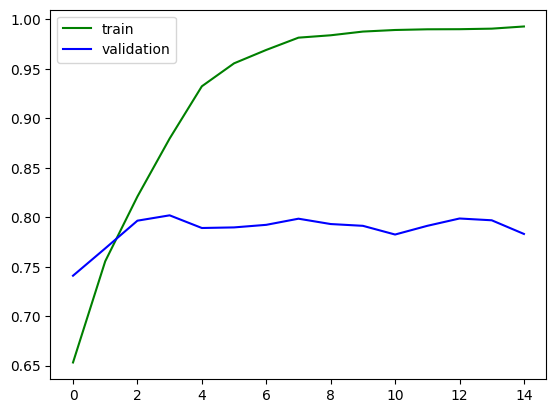

In [13]:
plt.plot(history.history['accuracy'],color='green',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

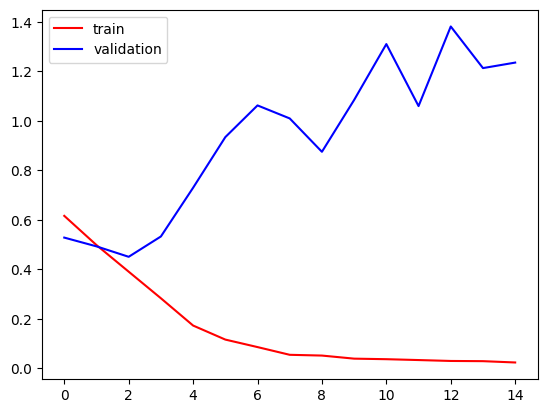

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()